In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX

In [2]:
import os

def get_files(path):
    return os.listdir(path)

cascPath = "/Users/abdulrehman/opt/anaconda3/envs/Face-Detection/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml"

def return_bbx(image):
    faceCascade = cv2.CascadeClassifier(cascPath)
    faces = faceCascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, flags=cv2.CASCADE_SCALE_IMAGE)
    return faces

In [3]:
get_files('/Users/abdulrehman/Desktop/SML Project/FacesInTheWild/lfw-deepfunneled')

['German_Khan',
 'Stefano_Gabbana',
 'Dragan_Covic',
 'Jeff_Hornacek',
 'Sureyya_Ayhan',
 'Deb_Santos',
 'Bob_Newhart',
 'Wang_Hailan',
 'Paul_McNulty',
 'Jimmy_Iovine',
 'Claudia_Pechstein',
 'Ranil_Wickremasinghe',
 'Ben_Chandler',
 'Mark_Komara',
 'Rand_Beers',
 'Joanne_Woodward',
 'John_Bond',
 'Reginald_Hudlin',
 'Lee_Baca',
 'Mary-Kate_Olsen',
 'Emily_Stevens',
 'Xiang_Huaicheng',
 'Phil_Mickelson',
 'Gerry_Kelly',
 'Salma_Hayek',
 'Jim_Edmonds',
 'Martina_McBride',
 'Anthony_Pico',
 'Jose_Theodore',
 'Heidi_Fleiss',
 'Mark_Richt',
 'Mike_Smith',
 'Paul_ONeill',
 'Horace_Newcomb',
 'Mohammad_Fares',
 'JK_Rowling',
 'Shinya_Taniguchi',
 'Tony_Curtis',
 'Laurie_Pirtle',
 'Angel_Maza',
 'Ray_Sherman',
 'Nancy_Powell',
 'Kathryn_Tucker',
 'Gro_Harlem_Brundtland',
 'Jacqueline_Marris',
 'Mikhail_Gorbachev',
 'Takuma_Sato',
 'Ray_Lewis',
 'Hank_Aaron',
 'Chip_Knight',
 'Tracee_Treadwell',
 'Ronald_Young_Jr',
 'Gustavo_Cisneros',
 'Jack_Osbourne',
 'Isidro_Pastor',
 'Mike_Duke',
 'Natal

In [4]:
Dataset_path = '/Users/abdulrehman/Desktop/SML Project/FacesInTheWild/'

Celebs = pd.read_csv(Dataset_path+'lfw_allnames.csv')
Celebs = Celebs[Celebs['images']>50]
Celebs

,name,images
373,Ariel_Sharon,77
1047,Colin_Powell,236
1404,Donald_Rumsfeld,121
1871,George_W_Bush,530
1892,Gerhard_Schroeder,109
2175,Hugo_Chavez,71
2288,Jacques_Chirac,52
2468,Jean_Chretien,55
2682,John_Ashcroft,53
2941,Junichiro_Koizumi,60


In [5]:
for _,[name,images] in Celebs.iterrows():
    print(name)
    print(get_files(Dataset_path+'lfw-deepfunneled/'+name))
    print('\n\n')

Ariel_Sharon
['Ariel_Sharon_0050.jpg', 'Ariel_Sharon_0044.jpg', 'Ariel_Sharon_0045.jpg', 'Ariel_Sharon_0051.jpg', 'Ariel_Sharon_0047.jpg', 'Ariel_Sharon_0053.jpg', 'Ariel_Sharon_0052.jpg', 'Ariel_Sharon_0046.jpg', 'Ariel_Sharon_0042.jpg', 'Ariel_Sharon_0056.jpg', 'Ariel_Sharon_0057.jpg', 'Ariel_Sharon_0043.jpg', 'Ariel_Sharon_0055.jpg', 'Ariel_Sharon_0041.jpg', 'Ariel_Sharon_0069.jpg', 'Ariel_Sharon_0068.jpg', 'Ariel_Sharon_0040.jpg', 'Ariel_Sharon_0054.jpg', 'Ariel_Sharon_0033.jpg', 'Ariel_Sharon_0027.jpg', 'Ariel_Sharon_0026.jpg', 'Ariel_Sharon_0032.jpg', 'Ariel_Sharon_0018.jpg', 'Ariel_Sharon_0024.jpg', 'Ariel_Sharon_0030.jpg', 'Ariel_Sharon_0031.jpg', 'Ariel_Sharon_0025.jpg', 'Ariel_Sharon_0019.jpg', 'Ariel_Sharon_0021.jpg', 'Ariel_Sharon_0035.jpg', 'Ariel_Sharon_0009.jpg', 'Ariel_Sharon_0008.jpg', 'Ariel_Sharon_0034.jpg', 'Ariel_Sharon_0020.jpg', 'Ariel_Sharon_0036.jpg', 'Ariel_Sharon_0022.jpg', 'Ariel_Sharon_0023.jpg', 'Ariel_Sharon_0037.jpg', 'Ariel_Sharon_0012.jpg', 'Ariel_Shar

(112, 112, 3)


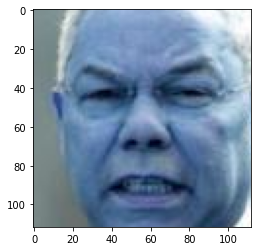

In [6]:
image = cv2.imread(Dataset_path+'lfw-deepfunneled/Colin_Powell/Colin_Powell_0007.jpg')
faces = return_bbx(image)
(x,y,w,h) = faces[0]
cropped = image[x:x+w, y:y+h]
plt.imshow(cropped)
print(cropped.shape)

(64, 64, 3)


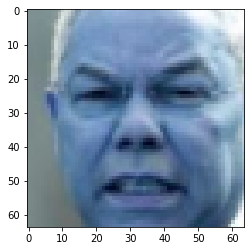

In [7]:
r = 64.0 / cropped.shape[1]
dim = (64, int(cropped.shape[0] * r))
resized = cv2.resize(cropped, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)
print(resized.shape)

In [8]:
X = []
Y = []

for _, [name,__] in Celebs.iterrows():
    celeb_path = Dataset_path+'lfw-deepfunneled/'+name+'/'
    
    images_paths = get_files(celeb_path)
    for image_path in images_paths:
        image = cv2.imread(celeb_path+image_path,1)
        faces = return_bbx(image)
        if len(faces) == 1:
            (x,y,w,h) = faces[0]
            cropped = image[x:x+w, y:y+h]
            dim = (224, 224)
            resized = cv2.resize(cropped, dim, interpolation = cv2.INTER_AREA)
            image = np.array(resized).astype("float32")
            X.append(image)
            Y.append(name)
X_data = np.array(X)
Y_data = np.array(Y)

In [9]:
X_data = np.array(X)
Y_data = np.array(Y)

print(X_data.shape)
print(Y_data.shape)

(1431, 224, 224, 3)
(1431,)


In [10]:
from collections import Counter

counter = Counter(Y_data)
print(counter)

Counter({'George_W_Bush': 480, 'Colin_Powell': 213, 'Tony_Blair': 138, 'Donald_Rumsfeld': 109, 'Gerhard_Schroeder': 106, 'Ariel_Sharon': 70, 'Hugo_Chavez': 67, 'Jacques_Chirac': 51, 'Jean_Chretien': 51, 'Junichiro_Koizumi': 51, 'Serena_Williams': 48, 'John_Ashcroft': 47})


In [11]:
from imblearn.under_sampling import NearMiss

X_data_reshaped = X_data.reshape(X_data.shape[0], X_data.shape[1] * X_data.shape[2] * X_data.shape[3])
undersample = NearMiss(version=1)
X_resampled, Y_resampled = undersample.fit_resample(X_data_reshaped,Y_data)
X_data = X_resampled.reshape(X_resampled.shape[0], X_data.shape[1], X_data.shape[2], X_data.shape[3])
Y_data = Y_resampled
counter = Counter(Y_data)
print(counter)

del X_data_reshaped
del undersample
del X_resampled
del Y_resampled
del counter

Counter({'Ariel_Sharon': 47, 'Colin_Powell': 47, 'Donald_Rumsfeld': 47, 'George_W_Bush': 47, 'Gerhard_Schroeder': 47, 'Hugo_Chavez': 47, 'Jacques_Chirac': 47, 'Jean_Chretien': 47, 'John_Ashcroft': 47, 'Junichiro_Koizumi': 47, 'Serena_Williams': 47, 'Tony_Blair': 47})


In [12]:
print(X_data.shape)
print(Y_data.shape)

(564, 224, 224, 3)
(564,)


In [13]:
import keras
import tensorflow as tf
from keras.applications import VGG16

model = VGG16(weights = 'imagenet',include_top = True, input_shape = (224,224,3))

out = [layer.output for layer in model.layers][-7]
extractor = keras.Model(inputs=model.inputs, outputs=out)

In [14]:
features = extractor(X_data)
features = tf.make_tensor_proto(features)
features = tf.make_ndarray(features)
features.shape

(564, 14, 14, 512)

In [15]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


scaler = MinMaxScaler(feature_range=(0, 1))
X_data = scaler.fit_transform(features)
labelencoder = LabelEncoder()
Y_data = labelencoder.fit_transform(Y_data)

In [16]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, train_size=0.9, random_state = 0)

In [17]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [0, 1, 2, 3, 4, 5, 6],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000]}]

In [ ]:
scores = ['accuracy']


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy



In [ ]:
linear = svm.SVC(kernel='linear', C=2).fit(X_train, y_train)
accuracy_lin = linear.score(X_train, y_train)
print("Training Accuracy Linear Kernel:", accuracy_lin*100)
accuracy_lin = linear.score(X_test, y_test)
print("Testing Accuracy Linear Kernel:", accuracy_lin*100)

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.001, C=100).fit(X_train, y_train)
accuracy_rbf = rbf.score(X_train, y_train)
print("Training Accuracy Radial Basis Kernel:", accuracy_rbf*100)
accuracy_rbf = rbf.score(X_test, y_test)
print("Testing Accuracy Radial Basis Kernel:", accuracy_rbf*100)

In [ ]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
accuracy_poly = poly.score(X_train, y_train)
print("Training Accuracy Polynomial Kernel:", accuracy_poly*100)
accuracy_poly = poly.score(X_test, y_test)
print("Testing Accuracy Polynomial Kernel:", accuracy_poly*100)

In [ ]:
sig = svm.SVC(kernel='sigmoid', C=10).fit(X_train, y_train)
accuracy_sig = sig.score(X_train, y_train)
print("Training Accuracy Sigmoid Kernel:", accuracy_sig*100)
accuracy_sig = sig.score(X_test, y_test)
print("Testing Accuracy Sigmoid Kernel:", accuracy_sig*100)